In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import pytz
import datetime
# Đọc dữ liệu từ file csv vào dataframe
df = pd.read_csv("AAPL.csv")
df1=df.reset_index()['Close']

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [3]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [4]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [5]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest= create_dataset(test_data, time_step)

In [6]:
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=X_train[0][0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.01)
kf.em(X_train[0])
test_data

array([[0.73249129],
       [0.72341045],
       [0.73126225],
       [0.70729711],
       [0.72074766],
       [0.7268243 ],
       [0.73563196],
       [0.73296917],
       [0.73235471],
       [0.72347869],
       [0.71938214],
       [0.73884099],
       [0.7462149 ],
       [0.75789029],
       [0.77297942],
       [0.77639327],
       [0.77789536],
       [0.77250153],
       [0.77216013],
       [0.77680301],
       [0.77359399],
       [0.79899299],
       [0.78008027],
       [0.77434504],
       [0.78158237],
       [0.79161907],
       [0.78800041],
       [0.79018522],
       [0.78444998],
       [0.7869762 ],
       [0.76724419],
       [0.76690278],
       [0.78137755],
       [0.78144579],
       [0.78827347],
       [0.80527445],
       [0.83517965],
       [0.8534779 ],
       [0.85668692],
       [0.85934972],
       [0.86296838],
       [0.82794232],
       [0.85136133],
       [0.88590941],
       [0.88229075],
       [0.87539472],
       [0.86228557],
       [0.886

In [7]:
# Dự đoán giá chứng khoán cho tập kiểm tra và tập xác thực
test_observed = test_data
validate_observed = val_data

test_predicted, _ = kf.filter(test_observed)
val_predicted, _ = kf.filter(validate_observed)
val_predicted

array([[0.32122951],
       [0.63061329],
       [0.73028187],
       [0.74099267],
       [0.79549104],
       [0.801485  ],
       [0.79080893],
       [0.76118059],
       [0.7230929 ],
       [0.70873282],
       [0.70672245],
       [0.7087977 ],
       [0.68782033],
       [0.73726489],
       [0.76609657],
       [0.76856391],
       [0.77756595],
       [0.77456751],
       [0.7826384 ],
       [0.78784945],
       [0.77416958],
       [0.77998972],
       [0.78598546],
       [0.77404838],
       [0.75210492],
       [0.7309272 ],
       [0.75629318],
       [0.76560922],
       [0.7662141 ],
       [0.76089183],
       [0.74183088],
       [0.72660917],
       [0.72979331],
       [0.72850917],
       [0.73899011],
       [0.74687763],
       [0.73880841],
       [0.70491023],
       [0.68491108],
       [0.66859891],
       [0.66312228],
       [0.6761109 ],
       [0.66516666],
       [0.65998296],
       [0.64979629],
       [0.62793819],
       [0.6377177 ],
       [0.642

In [8]:
test_predicted=scaler.inverse_transform(test_predicted)
val_predicted=scaler.inverse_transform(val_predicted)

In [9]:
valid_rmse = np.sqrt(np.mean((val_predicted - yval)**2))
test_rmse = np.sqrt(np.mean((test_predicted - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 148.40332166607172
Testing RMSE: 157.02413776244416


In [10]:
lst_output = []
x_input = val_data[60:]
temp_input=list(x_input)
n_steps=76

i = 0
while i < 10:
    if(len(temp_input)>76):
        new=[]
        x_input = temp_input[1:]
        for num in x_input:
            if type(num) == np.ndarray:
                for num2 in num:new.append(num2)
            else:new.append(num)
        x_input=new
        print("{} day input {}".format(i, x_input))

        yhat = kf.filter(x_input)
        yhat = list(yhat)
        print("{} day output {}".format(i,yhat[0][-1]))
        temp_input.extend(yhat[0])
        temp_input = temp_input[1:]
        lst_output.extend(yhat[0][-1])
        i += 1
    else:
        yhat = kf.filter(x_input)
        yhat=list(yhat)
        print(yhat[0])
        temp_input.extend(yhat[0])
        print(len(temp_input))
        lst_output.extend(yhat[0][-1])
        i=i+1

[[0.291867  ]
 [0.57051182]
 [0.67939641]
 [0.71118145]
 [0.73104261]
 [0.74651779]
 [0.73771361]
 [0.74096137]
 [0.74731301]
 [0.77450164]
 [0.80027868]
 [0.79547414]
 [0.80760033]
 [0.79867325]
 [0.79094918]
 [0.78916487]
 [0.80187081]
 [0.80284496]
 [0.8131044 ]
 [0.8087742 ]
 [0.80198737]
 [0.78082876]
 [0.77615827]
 [0.77697319]
 [0.76466217]
 [0.76642907]
 [0.76460404]
 [0.75421616]
 [0.75374017]
 [0.77751177]
 [0.79809856]
 [0.79417854]
 [0.79887473]
 [0.78970456]
 [0.77704464]
 [0.78225234]
 [0.79380151]
 [0.79931642]
 [0.81442005]
 [0.8152167 ]
 [0.82668156]
 [0.83908476]
 [0.8362256 ]
 [0.84046242]
 [0.84796734]
 [0.84113225]
 [0.83603093]
 [0.84899794]
 [0.86052037]
 [0.87602537]
 [0.88685394]
 [0.88774944]
 [0.879295  ]
 [0.88083107]
 [0.86902796]
 [0.85955498]
 [0.85329389]
 [0.87682773]
 [0.88262192]
 [0.88454449]
 [0.89094504]
 [0.89838546]
 [0.89615548]
 [0.88783578]
 [0.88665771]
 [0.87899711]
 [0.87653197]
 [0.89747972]
 [0.91002645]
 [0.91356685]
 [0.90977865]
 [0.90

In [11]:
lst_output=np.array(lst_output).reshape(-1,1)
lst_output=scaler.inverse_transform(lst_output)

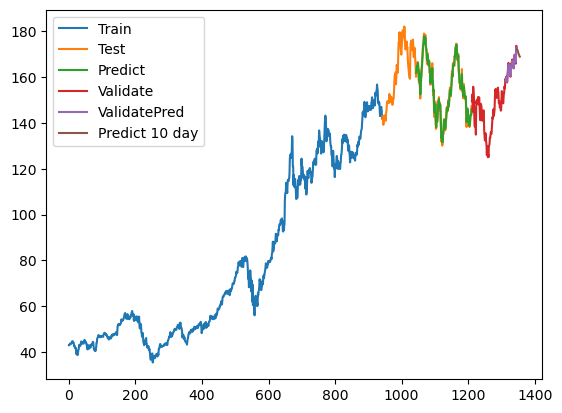

In [13]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(test_predicted[101:,0]))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,val_predicted[101:,0])
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+9, step=1)
plt.plot(prediect_data_index,lst_output[:,0])
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict 10 day'])
plt.show()